## Introduction

In this tutorial we look at numerous examples of how `dicomsplit` works.

In [1]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.medical.imaging import *

from fmi.explore import *
from fmi.preprocessing import *
from fmi.pipeline import *

In [2]:
from nbdev.showdoc import *

`check_duplicate` is a handy `fmi` function that checks to see if there are any duplicate patients in the train and valid indexes.  It displays a histograph of the train/valid split both before and after `dicomsplit`

In [3]:
show_doc(check_duplicate)

<h4 id="check_duplicate" class="doc_header"><code>check_duplicate</code><a href="https://github.com/asvcode/fmi/tree/master/fmi/preprocessing.py#L135" class="source_link" style="float:right">[source]</a></h4>

> <code>check_duplicate</code>(**`items`**, **`valid_pct`**=*`0.2`*, **`seed`**=*`5`*)

Helper for dicomsplit to visualize duplicates

### SIIM_Small Dataset

In [4]:
pneumothorax_source = untar_data(URLs.SIIM_SMALL)
pneumo_items = get_dicom_files(pneumothorax_source)
pneumo_items

(#276) [Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000000.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000000C.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000002.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000005.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000006.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000006C.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000007.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000008.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000009.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000011.dcm')...]

Train: 221 
 Original Validation: 55 
 Updated Validation: 46


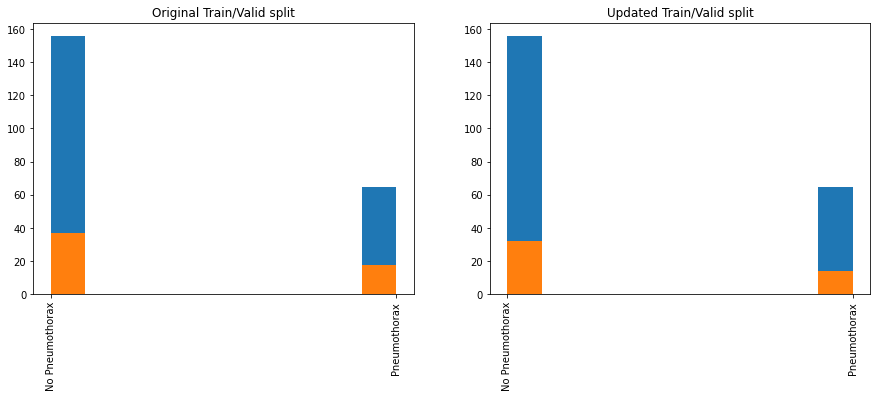

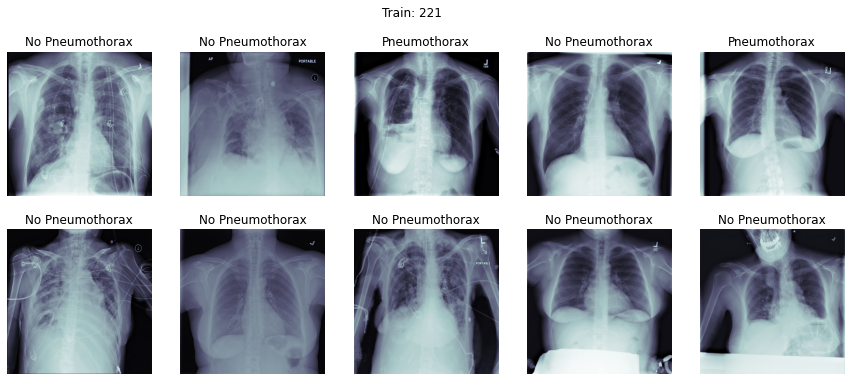

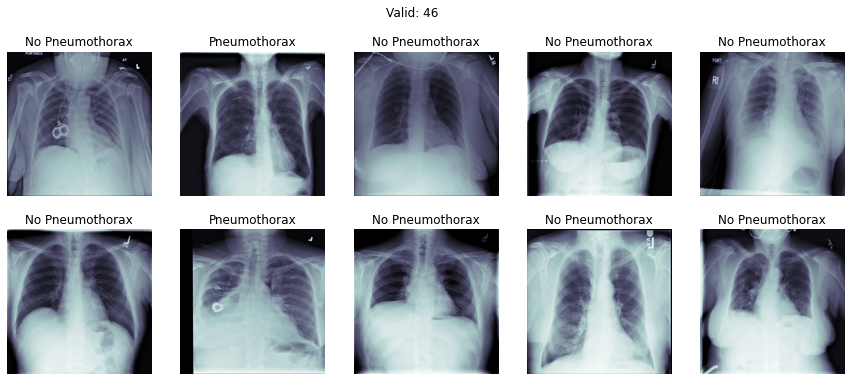

In [5]:
check_duplicate(pneumo_items, valid_pct=0.2, seed=7)

`fmi` has 2 handy functions that conveniently display image and patient identifiers

In [7]:
get_image_info(pneumo_items[0])

(0008, 0060) Modality                            CS: 'CR'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0030) Pixel Spacing                       DS: [0.168, 0.168]
No SliceThickness
(0028, 0100) Bits Allocated                      US: 8
No Rescale Intercept
No Rescale Slope


In this case the modality of the dataset is Computed Radiography stored in MONOCHROME2 format(low values=dark, high values=bright), pixels are 8 bit meaning the pixel values will range from 0 to 255.  There is no SliceThickness, RescaleSlope and RescaleIntercept values

In [9]:
get_pii(pneumo_items[0])

(0010, 0010) Patient's Name                      PN: '16d7f894-55d7-4d95-8957-d18987f0e981'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '62'
No Image Comments


### OSIC Pulmonary Fibrosis Dataset

In [10]:
osic = 'D:/Datasets/osic-pulmonary-fibrosis-progression/train'
osic_items = get_dicom_files(osic)
osic_items

(#32684) [Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/1.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/10.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/11.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/12.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/13.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/14.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/15.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/16.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/17.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/18.dcm')...]

`fmi` has a convenient `random_` function that can be used to generate a random index.  We use this to create a smaller random dataset for convenience to show how `dicomsplitter` works.  in this case we generate a random list of `100`

In [11]:
rand_osic = random_(osic_items, value=100)
rand_osic

(#100) [Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00135637202224630271439/31.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00422637202311677017371/37.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00283637202278714365037/126.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00134637202223873059688/14.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00035637202182204917484/155.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00135637202224630271439/105.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00422637202311677017371/59.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00360637202295712204040/220.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00376637202297677828573/273.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00042637202184406822975/480.dcm')...]

Train: 80 
 Original Validation: 20 
 Updated Validation: 11


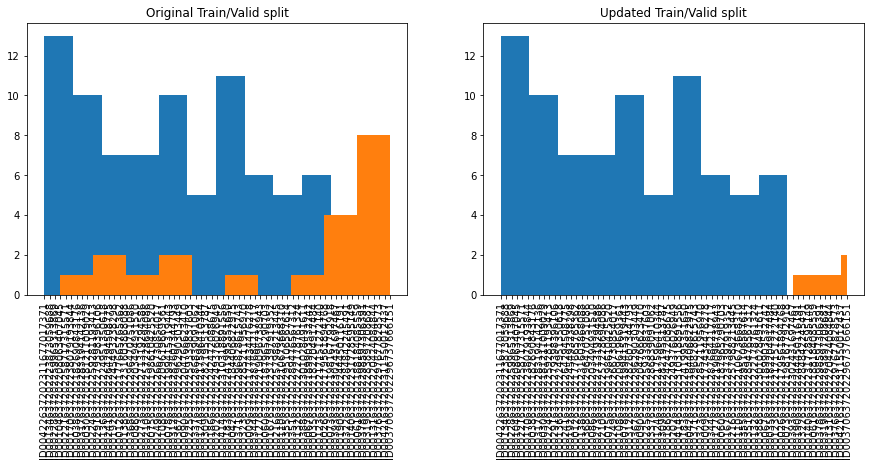

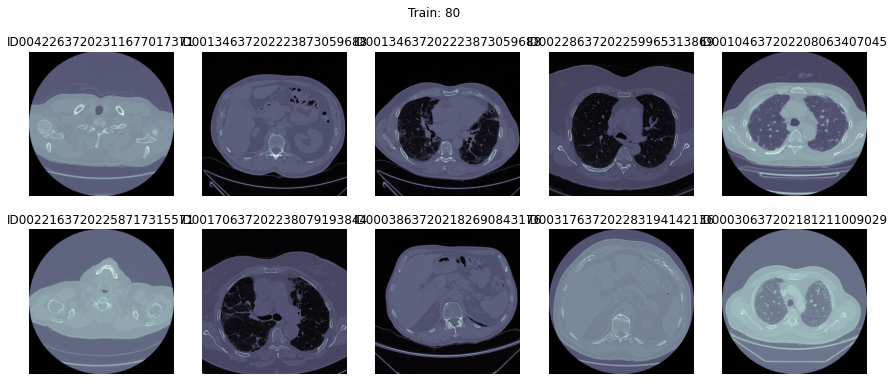

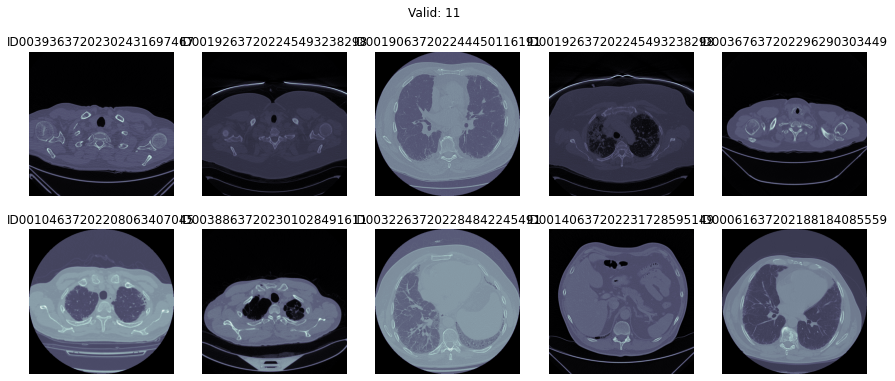

In [22]:
check_duplicate(rand_osic, valid_pct=0.2, seed=7)

In [12]:
get_image_info(rand_osic[0])

(0008, 0060) Modality                            CS: 'CT'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0030) Pixel Spacing                       DS: [0.741, 0.741]
(0018, 0050) Slice Thickness                     DS: "1.0"
(0028, 0100) Bits Allocated                      US: 16
(0028, 1052) Rescale Intercept                   DS: "0.0"
(0028, 1053) Rescale Slope                       DS: "1.0"


This dataset is made of Computer tomography (CT) images stored in MONOCHROME2 format. CT scans predominantly use X-Rays to produce 3D images (these images are in 2D but are rendering together to produce a 3D representation).  This is why we now have a SliceThickness value.  The slices are stored as 16 bits and hence pixel values can range from -32,700 to +32700

In [14]:
get_pii(rand_osic[0])

(0010, 0010) Patient's Name                      PN: 'ID00135637202224630271439'
No Patient Birth Date
(0010, 0040) Patient's Sex                       CS: ''
No patient Age
No Image Comments


### RSNA Pneumonia Dataset

In [15]:
rsna = 'D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images'
rsna_items = get_dicom_files(rsna)
rand_rsna = random_(rsna_items, value=500)
rand_rsna

(#500) [Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/484ebbaf-cdbe-4b08-ae85-c81ec72ff884.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/4c476833-0b39-4340-8fc6-c1be38cf13d2.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/be04b555-9fb1-4044-be19-e4e9ebbdccc5.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/a0688bb5-65a3-4b02-b0a5-cd0dc775608d.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/7252d75d-6ac8-4220-a108-5406de4a6b22.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/8a283d3e-888f-4b6a-ae13-200b21f9e69a.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/fb5d6826-b9ea-4ab6-abb4-96a530496c62.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/ff1c8291-32bd-4d9a-8c4e-570dca044bcc.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/sta

Train: 400 
 Original Validation: 100 
 Updated Validation: 96


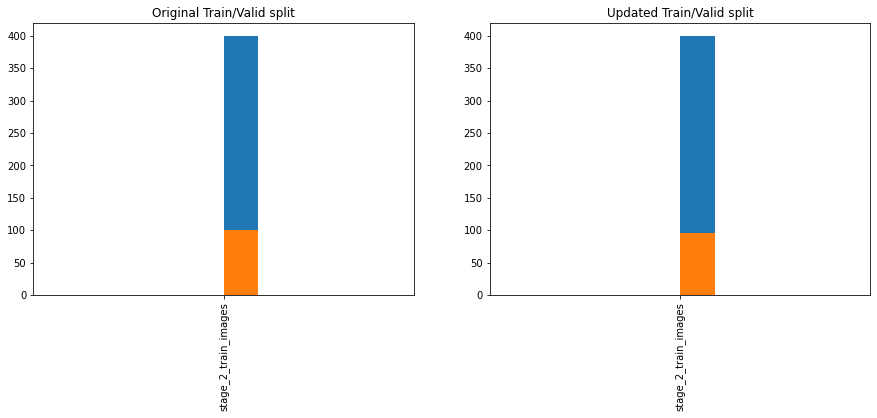

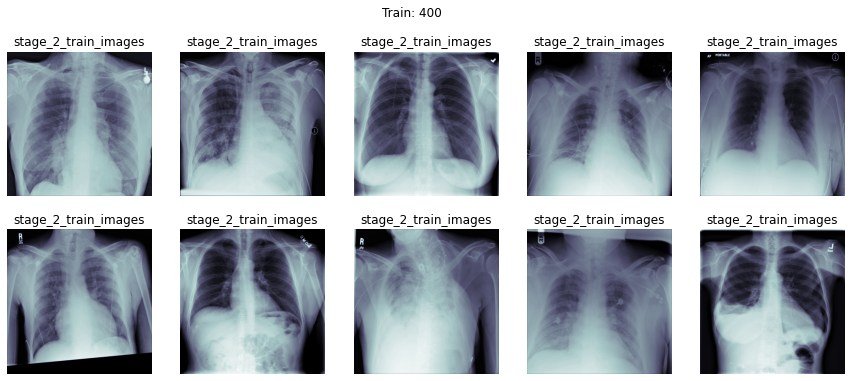

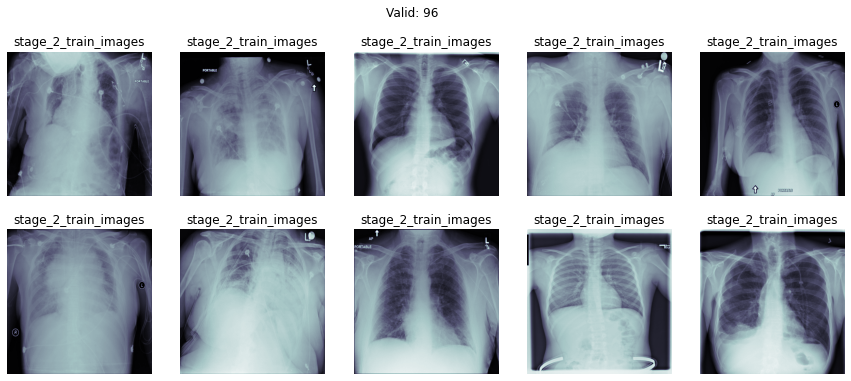

In [14]:
check_duplicate(rand_rsna, valid_pct=0.2, seed=7)

In [16]:
get_image_info(rand_rsna[0])

(0008, 0060) Modality                            CS: 'CR'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0030) Pixel Spacing                       DS: [0.168, 0.168]
No SliceThickness
(0028, 0100) Bits Allocated                      US: 8
No Rescale Intercept
No Rescale Slope


In [17]:
get_pii(rand_rsna[0])

(0010, 0010) Patient's Name                      PN: '484ebbaf-cdbe-4b08-ae85-c81ec72ff884'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's Age                       AS: '39'
No Image Comments


More to come